In [45]:
"""
Basic algorithm of k- Nearest Neighbours. Euclidean distance of the test point
from every other point is calculated. The distances are sorted in ascending order.
The votes of a point to be in either class are given according to the first 'k' distances
The point is classified into the group with maximum votes
"""

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

%matplotlib inline

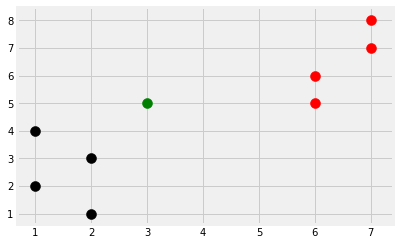

In [55]:
dataset = {'black': [[1, 2], [2, 3], [2, 1], [1, 4]], 'red':[[6, 5], [6, 6], [7, 8], [7, 7]]}
# point to be classified
new_point = [3, 5]

for i in dataset:
    for point in dataset[i]:
        plt.scatter(point[0], point[1], s=100, color=i)
        
plt.scatter(new_point[0], new_point[1], s=100, color='g')

In [56]:
# data: test set, predict: point to be classified
def k_nearest_neighbours(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('Too few votes')
    distances = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = np.sqrt(np.sum(np.array(features)-np.array(predict))**2)
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    
    # giving the grup for the point. we choose the top threee votes in this case. 2:1 voting
    votes = [i[1] for i in sorted(distances)[:k]]
    result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return result, confidence

In [57]:
new_result = k_nearest_neighbours(dataset, new_point, k=3)
print(new_result)

('black', 0.6666666666666666)
